In [5]:
# prompt: /content/retail object.v1i.yolov5pytorch.zip unzip

!unzip /content/retail_object.v1i.yolov5pytorch.zip -d /content/retail_object


Archive:  /content/retail_object.v1i.yolov5pytorch.zip
  inflating: /content/retail_object/README.dataset.txt  
  inflating: /content/retail_object/README.roboflow.txt  
  inflating: /content/retail_object/data.yaml  
   creating: /content/retail_object/test/
   creating: /content/retail_object/test/images/
 extracting: /content/retail_object/test/images/112_jpg.rf.1ae4b3ec953a29e1ea4484946c3fee04.jpg  
 extracting: /content/retail_object/test/images/116_jpg.rf.3a6a49255e2d6e9ff31dc828e9ef67a0.jpg  
 extracting: /content/retail_object/test/images/120_jpg.rf.23bd6d14b73a59b9a0d6baf41ca1d350.jpg  
 extracting: /content/retail_object/test/images/128_jpg.rf.096abe4dcdcf670e8081d9f5e8c0d451.jpg  
 extracting: /content/retail_object/test/images/134_jpg.rf.a440b1dc170f54867041410192058efe.jpg  
 extracting: /content/retail_object/test/images/152_jpg.rf.2a04b33e27dcd2068ab9b8749e94f739.jpg  
 extracting: /content/retail_object/test/images/174_jpg.rf.dbb9f0ac0823bec4c7f7919afa194896.jpg  
 extr

In [1]:
import torch
import torch.nn as nn
import torchvision
import cv2
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [2]:
!cat /kaggle/input/retail-object-v1i-yolov5pytorch/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 475
names: ['24 seven pop corn butter flavoured', '24 seven pop corn salted', '4700bc hawaiian barbeque cheese popcorn', 'acin spicy pudina flavours popcorn', 'act ii bliss caramel popcorn', 'act ii butter flavour popcorn', 'act ii butter pop corn', 'act ii cheese bakes', 'act ii cheese nachoz', 'act ii classic salted instant popcorn', 'act ii instant popcorn golden sizzle', 'act ii instant popcorn simply salted', 'act ii jalapeno nachoz', 'act ii movie theatre butter flavour popcorn', 'act ii nacho tomato', 'act ii nachoz salted', 'act ii nachoz sizzling peri peri', 'act ii nachoz tomato crispy n crunchy', 'act ii ready to eat popcorn sour cream n cheese', 'act ii ready to eat sweet and salty popcorn', 'act ii sour cream n cheese flavour popcorn', 'alans bugles cheese flavour', 'alans bugles chips tomato flavor', 'alans bugles original', 'balaji wafers creamy onion', 'balaji wafers masala masti', 'balaji wafers pizz

In [4]:
# !pip install torch torchvision torchaudio
# !pip install opencv-python numpy matplotlib tqdm


from google.colab import drive
drive.mount('/content/drive')

In [3]:
train:'/kaggle/input/retail-object-v1i-yolov5pytorch/train/images'

val:'/kaggle/input/retail-object-v1i-yolov5pytorch/valid/images'

test:'/kaggle/input/retail-object-v1i-yolov5pytorch/test/images'


nc: 475
names: ['24 seven pop corn butter flavoured', '24 seven pop corn salted', '4700bc hawaiian barbeque cheese popcorn', 'acin spicy pudina flavours popcorn', 'act ii bliss caramel popcorn', 'act ii butter flavour popcorn', 'act ii butter pop corn', 'act ii cheese bakes', 'act ii cheese nachoz', 'act ii classic salted instant popcorn', 'act ii instant popcorn golden sizzle', 'act ii instant popcorn simply salted', 'act ii jalapeno nachoz', 'act ii movie theatre butter flavour popcorn', 'act ii nacho tomato', 'act ii nachoz salted', 'act ii nachoz sizzling peri peri', 'act ii nachoz tomato crispy n crunchy', 'act ii ready to eat popcorn sour cream n cheese', 'act ii ready to eat sweet and salty popcorn', 'act ii sour cream n cheese flavour popcorn', 'alans bugles cheese flavour', 'alans bugles chips tomato flavor', 'alans bugles original', 'balaji wafers creamy onion', 'balaji wafers masala masti', 'balaji wafers pizzy masala', 'balaji wafers pizzy masala potato flavour', 'balaji wafers simply salted', 'balaji wafers tomato chips', 'balaji wheelos masala wheels', 'banner n co garlic overload', 'bc bikaneri bhujia', 'beyond snack kerala banana chips', 'bhikharam chandmal all in one', 'bhikharam chandmal khasta mix', 'bhikharam chandmal khatta mitha', 'bhikharam chandmal moong dal', 'bhuji pure food jhakaas mix', 'biingo tomato potato chips', 'bikaji all in one kuch kuch', 'bikaji chips cream and onion', 'bikaji chips mast masala', 'bikaji falahari mix', 'bikaji moong dal', 'bikano aloo bhujia', 'bikano bikaneri bhujia', 'bikano boondi', 'bikano chips chatak masala', 'bikano chips cream and onion', 'bikano chips cream n onion', 'bikano chips simply salted', 'bikano chips tangy tomatos', 'bikano khatta meetha', 'bikano navratan mix', 'bikano shahi mixture', 'bingo achaari masti mad angles', 'bingo cheese nacho flavour', 'bingo cheese nachos play on', 'bingo chilli lemon nachos', 'bingo chilli limon nachos flavour', 'bingo chilli onion nachos flavour', 'bingo chips original style chilli', 'bingo cream and onion', 'bingo hashtag cream n onion', 'bingo hashtag indian masala', 'bingo hashtag spicy chilli', 'bingo hashtag spicy masala', 'bingo hashtags', 'bingo hashtags cream and onion chips', 'bingo hastags', 'bingo lays american style cream n onion', 'bingo mad angels achaari masti', 'bingo mad angels mmmm masala', 'bingo mad angels tomato madness', 'bingo mad angle mmmmm masala', 'bingo mad angle very peri peri', 'bingo mad angles achaari munch', 'bingo mad angles cheese nachos', 'bingo mad angles masala masti', 'bingo mad angles pizza aaah', 'bingo mad angles tango tomatos', 'bingo mad angles tomato masti', 'bingo nachos flavour', 'bingo no rulz masala curlz baked', 'bingo original potato style chilli', 'bingo original style salt', 'bingo potato chips', 'bingo potato chips cream n onion chips', 'bingo potato chips tomato flavour', 'bingo street bites dahi chaat remix', 'bingo street bites pani puri twist', 'bingo tedhe medhe', 'bingo tedhe medhe aloo bhujia', 'bingo tedhe medhe cocktail mix', 'bingo tedhe medhe khatta meetha', 'bingo tedhe medhe masala tadka', 'bingo tedhe medhe navrattan mix', 'bingo tedhe medhe pulse mix', 'bingo tomato chips', 'bingo tomato tango', 'bingoastags', 'brb popped potato chips spicy chipotle flavour', 'brij all in one mixture', 'brij plain namkeen', 'britannia little hearts classic', 'buy jacker potato crisps original flavour', 'chaskaah garlic chilli roasted chana', 'cheetos cheez puff', 'cheetos namkeen cheez puffs', 'chhedas finger pops masala', 'cornito nacho crisps sizzlin jalapeno', 'cornitos chana crusties cheesy garlic', 'cornitos cheese n herbs', 'cornitos cheese n herbs nacho chips', 'cornitos cheese n herbs nacho chipsi munch on the crunch', 'cornitos chusties dilli chaat', 'cornitos cornitos nacho chips peri peri', 'cornitos crusties chessy garlic', 'cornitos crusties dilli chat', 'cornitos crusties italian cheese potato snacks', 'cornitos crusties king curry', 'cornitos crusties lemon chilli bean snack', 'cornitos crusties peri peri', 'cornitos nacho cheese', 'cornitos nacho chips jalapeno munch on the crunch', 'cornitos nacho chips quinoa', 'cornitos nacho chips sea salt', 'cornitos nacho chips sweet chili', 'cornitos nacho chips sweet chili munch on the crunch', 'cornitos nacho chips tikka masala', 'cornitos nacho chips tomato mexicana', 'cornitos nacho crisp', 'cornitos nacho crisp peri peri', 'cornitos nacho crisp tikka masala', 'cornitos nacho crisps barbeque', 'cornitos nacho crisps cheese and herbs munch on the crunch', 'cornitos nacho crisps mild thai sweet chilli munch on the crunch', 'cornitos nacho crisps sea salt', 'cornitos nacho crisps sweet chilli', 'cornitos party mix', 'cornitos sea salt crisps nachos', 'crax cheese balls', 'crax cheese balls cream and onion', 'crax cheese balls namkeen', 'crax curls chatpata masala with the goodness of corn', 'crax double mazza', 'crax fritts cream n onion', 'crax natkhat classic', 'crax natkhat classic wheat puffs', 'crax natkhat masala', 'crunchy corn hawaiian barbeque', 'current hot n spicy sticks', 'daimond chips plain salted', 'diamond chips', 'diamond chips cream and onion flavour', 'diamond chips cream n onion', 'diamond chips magic masala', 'diamond chips tangy flavour', 'diamond chips tomchi flavour', 'diet foods healthy snacks', 'doritos chips sweet chilli flavour', 'doritos dinamita fiery lime n chilli flavour', 'doritos dinamita sizzling hot chips', 'doritos nacho cheese', 'doritos nacho cheese flavored', 'doritos nacho chips', 'doritos nacho chips sweet chilli', 'doritos sizzlin hot', 'doritos spicy nacho', 'durga agencies snack', 'fit n flex multigrain mixture cheesy cheese flavour', 'fit n flex multigrain mixture tangi tomato flavour', 'flaveo baked barley chips', 'flaveo baked jawar chips', 'full toss baked', 'fun flips cheesy pizza', 'fun flips curly puff mocktail', 'fun flips curly puffs hot n saucy', 'fun flips curly puffs masala', 'fun flips pudina puffs', 'fun flips puff hot n spicy', 'fun flips puff khatta meetha', 'fun flips puff sizzlin chinese', 'fun flips puffs', 'fun flips puffs hot n saucy puffcorn', 'fun flips puffs tango', 'garde sabudana chivda maharashtra special', 'garden yellow banana chips', 'haldiams salted peanuts', 'haldiram all in one', 'haldiram bhujia', 'haldiram boondi', 'haldiram chips classic salted', 'haldiram halke fulke potato chips', 'haldiram halke fulke testy crunchy', 'haldiram khatta meetha namkeen', 'haldiram moong dal', 'haldiram navrattan', 'haldiram nut cracker peanuts crispy crunchy', 'haldirams aloo bhujia', 'haldirams classic salted peanuts', 'haldirams dal biji', 'haldirams fatafat bhel', 'haldirams halke fulke salted potato chip', 'haldirams lemon bhel', 'haldirams lite murmura sensibal snacking', 'haldirams masala peanuts spicy treat', 'haldirams mathri', 'haldirams moong daal', 'haldirams namkeen all in one mixture', 'haldirams namkeen navrattan', 'haldirams namkeen shahi mixture', 'haldirams punjabi tadka', 'haldirams snac lite fun fingers lightly spiced', 'haldirams snack lite fun fingers', 'himalayan salt caramel popcorn', 'hully gully cornpuffs cheese flavour', 'hully gully cornpuffs khatta meetha', 'hully gully cornpuffs magic masala', 'hully gully cornpuffs tangi pudina', 'hully gully golden pack classic salted', 'indian masala', 'jabsons banana chips simply salted', 'jabsons bar b que roasted peanuts', 'jabsons mini bhakarwadi', 'jacker cheese', 'jacker hot n spicy', 'jacker hot n spicy potato chips', 'jacker original', 'jacker sour cream n onion', 'jacker tomato chips', 'jackers potato crisps', 'kettle krisps hot jalapeno', 'kettle studio banana chips lime n chilli', 'kettle studio crushed paprika with exotic spices', 'kettle studio mature cheddar n red onions', 'kukure masala munch', 'kurkure chaat fills', 'kurkure chaat fills bhel chutney twist', 'kurkure chaat fills crisps papdi chaat twist', 'kurkure chili chataka', 'kurkure chili chatka', 'kurkure green chutney flavour', 'kurkure masaala munch', 'kurkure namkeen naughty tomatoes', 'kurkure namkeen puffcorn yummy cheesechat', 'kurkure namkeen solid masti twisteez', 'kurkure naughty tomato', 'kurkure pastax creamy herb n onion', 'kurkure plays puffcorn yummy cheese', 'kurkure plays puffcorn yummy chips', 'kurkure playz puff masala munch', 'kurkure playz puffs masala masti', 'kurkure sizzlin hot', 'kurkure solid masti masala twiste', 'kurlkure masala munch', 'lays american cream n onion', 'lays cheddar n sour cream potato chips', 'lays chile limon', 'lays chips indian magic masala', 'lays chips west indies hot nsweet chilli', 'lays classic potato chips salted', 'lays crispz herb and onion', 'lays gourmet cheese paprika', 'lays gourmet potato chips', 'lays gourmet potato chips thai sweet chilli', 'lays hashtag spicy masala', 'lays max macho chilli flavours', 'lays maxx', 'lays maxx sizzlin hot', 'lays potato chips sizzlin hot', 'lays potato chips spanish tomato tango', 'lays salt with pepper flavour', 'lays spanich tomato tango flavour', 'lays thai sweet chilli', 'lays tomato tango', 'lays wafer style onion with pepper', 'lays wafer style potato chips', 'lays wafer style potato chips salt with pepper', 'lays wafer style potato chips sundried chilli', 'lays wavy', 'lecclusif banana chips classic yellow', 'lecclusif kachori with dry fruits', 'lecclusif roasted potato chips tangy tomato', 'lentil n pea pop crisp masala twist', 'lexclurif roasted potato chips kolkata mix', 'lexclurif roasted potato chips masala n lime', 'lexclurif roasted potato chips sour cream n onion', 'lexclusif mirch masala lemon bhel namkeen', 'lexclusivf mirch masala banana chips', 'life soya chips masala magic', 'life soya chips pudina party', 'life soya sticks masala magic', 'life soya sticks tangy tomato', 'mad angles chips tomato madness', 'makino nacho chip tomato salsa', 'makino nacho chips cheese', 'makino nacho chips jalapeno', 'makino nacho chips sweet chilis', 'makino peri peri nacho chips', 'makino peri peri sweet chilli', 'max protein chinese manchurian', 'millet pop crisp sweet chilli', 'modern kitchen banana chips extra thin', 'modern kitchen potato wafers', 'mr makhana peri peri paradise', 'munchies ragi chips takatak tomato', 'munchiez ragi chips masala twist', 'muncriez roasted makhana cheezy onion', 'none', 'nongshim onion falvoured rings', 'nongshim shrimp flavoured cracker', 'nova nova waffle chips classic chocolate drizzle', 'nova nova waffle chips red velvet with milk chocolate drizzle', 'nutriboat okra chips vacuum cooked spiced n stormy', 'onion flavour rings', 'oriental super ring', 'orion turtle chips masala corn chip', 'orion turtle chips mexican lime corn chips', 'orion turtle chips pure veg tangy tomato corn chips', 'orion turtle chips sour cream n onion', 'orion turtle chips spicy devil corn chips', 'orion turtle tangy tomato', 'parle chatkeens aloo bhujia', 'parle classic salt', 'parle full toss baked', 'parle potato chips classic salted', 'parle tangy tomato', 'parle wafers cream and onion', 'parle wafers piri piri', 'parle wafers potato chips tangy tomato flavour', 'peppy chees balls', 'peppy chese balls', 'peppy classic tomato', 'peppy tomato disc', 'picnik classic tomato chilli', 'pipo roasted peanuts smoke house bbq', 'pitaara albela aloo bhujia', 'pitaara all in one', 'pitaara bikaneri bhujia', 'pitaara laajawaab all in one', 'potato chips spanish tomato tango', 'potato pop crisp cream n onion', 'prabhat namkeen', 'prabhuji bhujia munchy masti', 'prabhuji chat pata spicy spin', 'prabhuji fun food aloo bhujia', 'prabhuji haldiram munchy masti bhujia', 'prabhuji jhakaas mix', 'prabhuji pure food all in one', 'prabhuji pure food khata meetha', 'prabhuji pure food tok jhal mishti', 'pran phoochka', 'pran potato cracker', 'pringles bbq potato chips', 'pringles chips desi masala tadka', 'pringles chips fusion chutney', 'pringles chips original', 'pringles chips peri peri', 'pringles chips pizza', 'pringles chips sour cream and onion', 'pringles chips tomato twist', 'pringles original potato chips party stack', 'pringles potato chips sour cream and onion flavour party stack', 'pringles ranch', 'pringles salt n vinegar', 'pringles sizzlin chipotle sour cream flavour', 'pringles south african peri peri', 'pringles tangy tomato twist', 'pringles texas bbq', 'priniti char chare tangy tomato', 'priniti chips cream n onion', 'priniti potato chips', 'priniti potato chips classic salted', 'priniti potato chips sour cream n onion', 'priniti potato chips tomato punch', 'priniti sour classic salted', 'rajarams kara boondi', 'rajarams masala pori', 'rajarams masala wheels', 'rajarams roasted peanuts', 'rajarams spicy corn flakes', 'ritebite max protein chips spanish tomato', 'ritebite max protein cream and onion chips snack', 'saffola munchiez cheezy onion roasted makhana', 'saffola munchiez masala twist', 'saffola munchiez ragi chips', 'saffola munchiez roasted makhana masala twist', 'saffola munchiez takatak tomato', 'salsalito tex mex nacho chips creamy cheese', 'signature krisps sriracha n chilli lime', 'smart choice namkeen nut cracker', 'snac tac aloo bhujia', 'snac tac bhujia sev', 'snac tac bikaneri bhujia', 'snac tac chapata masala', 'snac tac classic salted', 'snac tac cream n onion', 'snac tac tangy tomato', 'snack corn puffs', 'snactac roasted chana', 'sundrop snacko bakes twisties cheese n herbs flavour crunchy snacks', 'taali cheese n herbs protein puffs', 'taali cream n onion protein puffs', 'taali masala mania protein puffs', 'taali protein puffs', 'taali protein puffs pudina punch', 'taali protein puffs smoky barbeque', 'taali protein puffs tomato basil', 'taali protein puffs tomato blast', 'taali roasted makhana caramel crunch', 'taali roasted makhana dark chocolate', 'taali roasted makhana pudina pop', 'taali roasted makhana sriracha spice', 'taali tikka masala roasted makhana', 'takatak chatpata masala', 'tedhe medhe navratan mix', 'tex mex nacho chips mexican chilli', 'tex mex nacho chips zesty jalapeno', 'tex mex nacho rounds classic salted', 'tong garden freshly roasted salted pistachios', 'tong garden salted pistachios', 'too yumm all in one', 'too yumm aloo bhujia', 'too yumm aloo chaat flavour potato stix', 'too yumm american style cream and onion', 'too yumm bhoot chips naagin hot sauce', 'too yumm bikaneri bhujia', 'too yumm chili achari', 'too yumm chips kashmiri chili', 'too yumm chips pudina masala', 'too yumm chips spanish tomato', 'too yumm chips tangi tomato', 'too yumm dahi papdi chaat flavour multigrain chips', 'too yumm indian masala flavour potato chips', 'too yumm karare chilli masala', 'too yumm karare masala munch', 'too yumm karare noodle masala', 'too yumm moong dal', 'too yumm moong dal namkeen', 'too yumm multigrain chip s tangy tomato', 'too yumm multigrain dahi paapdi chaat', 'too yumm namkeen salted peanuts', 'too yumm potato chips classic salted', 'too yumm potato stix', 'too yumm potato stix peri peri', 'too yumm ring tomato twist', 'too yumm rings aloo chaat', 'too yumm rings potato chips', 'too yumm rings tomato twist', 'too yumm spicy chilli potato wafers', 'too yumm tasty nuts namkeen', 'too yumm veggie stix', 'too yumm veggie stix chili chataka', 'too yumm veggie stix sour cream n onion', 'too yumm wafer style classic salted', 'turtle chips mexicana chips', 'turtle chips spicy devil', 'uncal chips plain salted', 'uncal chips spicy treat', 'waffle mill waffle chips cokkies n cream', 'waffle mill waffle chips dark choco drizzle and sea salt', 'waffle mill waffle chips milk choco drizzle', 'why fry y potato chips spicy chaat', 'why fryy popped mirch masala flavour potato chips', 'why fryy popped simply salt flavour potato chips', 'why fryy potato chips zesty tomato', 'whyfryy popped potato chips herby sour cream', 'whyfryy popped potato chips siply salt', 'whyfryy popped potato chips spicy chaat', 'wingreens butter garlic naan chips', 'wingreens farms naan chips tez tandoori', 'wingreens nan chips chatpata pudina', 'yellow diamond classic salted']


In [4]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17430, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 17430 (delta 73), reused 28 (delta 26), pack-reused 17327 (from 4)
Receiving objects: 100% (17430/17430), 16.31 MiB | 31.45 MiB/s, done.
Resolving deltas: 100% (11944/11944), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.2 MB/s eta 0:00:0000:01


In [7]:
from ultralytics import YOLO

# Load pre-trained YOLOv5 model
model5s = YOLO("yolov5s.pt")

# Train the model
model5s.train(
    data="/kaggle/input/retail-object-v1i-yolov5pytorch/data.yaml",  # Path to dataset
    epochs=50,
    batch=16,
    imgsz=640,

)


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.128 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/retail-object-v1i-yolov5pytorch/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=Non

train: Scanning /kaggle/input/retail-object-v1i-yolov5pytorch/train/labels... 1038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1038/1038 [00:02<00:00, 441.63it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/retail-object-v1i-yolov5pytorch/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 2.4±1.6 ms, read: 211.4±114.1 MB/s, size: 555.2 KB)


val: Scanning /kaggle/input/retail-object-v1i-yolov5pytorch/valid/labels... 43 images, 1 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<00:00, 210.69it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/retail-object-v1i-yolov5pytorch/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=2.1e-05, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.02G      2.241      6.327      1.988        686        640: 100%|██████████| 65/65 [00:23<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


                   all         43       1198    0.00349     0.0139    0.00419    0.00224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.84G      1.842      5.892       1.66        695        640: 100%|██████████| 65/65 [00:22<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]


                   all         43       1198    0.00706     0.0292    0.00958     0.0054

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.94G      1.786       5.23      1.573        683        640: 100%|██████████| 65/65 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         43       1198      0.356     0.0251      0.014    0.00881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.94G      1.749      4.611      1.502        687        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         43       1198       0.37     0.0431     0.0241     0.0137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.94G      1.725      4.246      1.475        734        640: 100%|██████████| 65/65 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]


                   all         43       1198      0.431     0.0526     0.0375     0.0227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.94G      1.688      3.904      1.453        486        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


                   all         43       1198      0.415     0.0643     0.0573     0.0354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.94G      1.684      3.639      1.446        586        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


                   all         43       1198      0.457     0.0851     0.0781     0.0482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.94G       1.66      3.378      1.432        541        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]


                   all         43       1198      0.514     0.0957     0.0992      0.062

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.94G      1.648      3.173      1.422        636        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]


                   all         43       1198      0.532      0.115      0.124     0.0787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.94G      1.617      2.965      1.415        801        640: 100%|██████████| 65/65 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]


                   all         43       1198      0.528      0.132      0.145     0.0896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.94G      1.612      2.857      1.404        580        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


                   all         43       1198      0.537       0.15      0.166      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.94G      1.601      2.722      1.391        721        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]


                   all         43       1198      0.509      0.154      0.186      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.94G      1.576      2.603      1.383        796        640: 100%|██████████| 65/65 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]


                   all         43       1198      0.486      0.182      0.201      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.94G      1.574      2.553       1.39        600        640: 100%|██████████| 65/65 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]


                   all         43       1198      0.538      0.193      0.212      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.94G      1.565      2.444      1.375        692        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]


                   all         43       1198        0.5      0.229      0.231      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.94G      1.554      2.379      1.376        504        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]


                   all         43       1198      0.533      0.234      0.239       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.94G      1.533      2.367      1.368        606        640: 100%|██████████| 65/65 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


                   all         43       1198      0.545       0.22      0.247      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.94G      1.519      2.303      1.357        777        640: 100%|██████████| 65/65 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]


                   all         43       1198      0.538      0.238       0.25      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.94G      1.522      2.271       1.35        626        640: 100%|██████████| 65/65 [00:22<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]


                   all         43       1198      0.515      0.252      0.264      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.94G      1.507       2.17      1.356        806        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]


                   all         43       1198      0.556       0.24      0.268      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.94G      1.492      2.151      1.339        715        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]


                   all         43       1198       0.54      0.248      0.273      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.94G      1.497       2.15      1.336        684        640: 100%|██████████| 65/65 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]


                   all         43       1198      0.525      0.265      0.286      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.94G      1.475      2.054      1.327        713        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


                   all         43       1198      0.572       0.26      0.292      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.94G      1.477      2.032      1.325        860        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]


                   all         43       1198      0.511      0.292      0.296      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.94G      1.493      2.104       1.35        617        640: 100%|██████████| 65/65 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]


                   all         43       1198      0.505      0.292      0.301      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.94G      1.436      1.976       1.31        708        640: 100%|██████████| 65/65 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]


                   all         43       1198      0.531      0.288      0.309      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.94G       1.48      2.019      1.331        416        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]


                   all         43       1198      0.562      0.277       0.31      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.94G      1.457      1.979      1.335        458        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


                   all         43       1198      0.557      0.282      0.317      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.94G      1.456          2      1.325        827        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]


                   all         43       1198      0.579      0.277      0.318      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.94G      1.445      1.956      1.311        639        640: 100%|██████████| 65/65 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]


                   all         43       1198      0.532      0.302      0.323      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.94G      1.422      1.891      1.302        706        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]


                   all         43       1198      0.523      0.304      0.328      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.94G      1.432      1.894      1.307        581        640: 100%|██████████| 65/65 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]


                   all         43       1198      0.549      0.295      0.326      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.94G      1.446      1.902      1.327        749        640: 100%|██████████| 65/65 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]


                   all         43       1198       0.57      0.295      0.328       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.94G      1.441      1.888      1.327        568        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]


                   all         43       1198      0.585      0.293       0.33      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.94G      1.424      1.837        1.3        678        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]


                   all         43       1198      0.573      0.296      0.334      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.94G       1.44      1.875      1.314        558        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]


                   all         43       1198      0.543       0.31       0.34      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.94G      1.413      1.849      1.298        642        640: 100%|██████████| 65/65 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]


                   all         43       1198      0.541      0.317      0.343       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.94G      1.419      1.804      1.306        528        640: 100%|██████████| 65/65 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]


                   all         43       1198      0.572      0.313      0.344       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.94G      1.415      1.834      1.295        720        640: 100%|██████████| 65/65 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


                   all         43       1198      0.583      0.307       0.35      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.94G      1.411      1.819      1.294        858        640: 100%|██████████| 65/65 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


                   all         43       1198      0.591      0.306       0.35      0.224
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.94G      1.452      1.863      1.366        412        640: 100%|██████████| 65/65 [00:23<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


                   all         43       1198      0.589      0.287      0.332       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.94G      1.416      1.836      1.347        460        640: 100%|██████████| 65/65 [00:21<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]


                   all         43       1198      0.594      0.296      0.331      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.94G      1.402      1.773      1.334        327        640: 100%|██████████| 65/65 [00:21<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


                   all         43       1198      0.592      0.307      0.343       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.94G      1.392      1.748      1.327        430        640: 100%|██████████| 65/65 [00:21<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]


                   all         43       1198      0.597       0.31      0.347      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.94G      1.386      1.738       1.33        354        640: 100%|██████████| 65/65 [00:21<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]


                   all         43       1198      0.596      0.306       0.35      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.94G      1.387      1.728      1.319        446        640: 100%|██████████| 65/65 [00:21<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


                   all         43       1198      0.594      0.312       0.35      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.94G      1.381      1.717       1.32        308        640: 100%|██████████| 65/65 [00:21<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


                   all         43       1198      0.592      0.314      0.352      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.94G      1.374      1.709      1.323        317        640: 100%|██████████| 65/65 [00:21<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]


                   all         43       1198      0.597      0.311      0.354       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.94G      1.379      1.711      1.316        403        640: 100%|██████████| 65/65 [00:21<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]


                   all         43       1198      0.595      0.314      0.354      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.94G      1.373      1.703       1.31        303        640: 100%|██████████| 65/65 [00:21<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


                   all         43       1198       0.59      0.312      0.354       0.23

50 epochs completed in 0.326 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 18.9MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 18.9MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv5s summary (fused): 84 layers, 9,295,361 parameters, 0 gradients, 24.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]


                   all         43       1198      0.597      0.311      0.354      0.231
4700bc hawaiian barbeque cheese popcorn          1          3          1          0          0          0
act ii bliss caramel popcorn          3          8          1          0          0          0
act ii butter pop corn          1          2          1          0          0          0
act ii classic salted instant popcorn          2          3          1          0       0.39      0.273
act ii instant popcorn golden sizzle          2          9          0          0          0          0
act ii instant popcorn simply salted          1          1          1          0          0          0
act ii movie theatre butter flavour popcorn          1          9          0          0          0          0
act ii ready to eat sweet and salty popcorn          1          2          0          0          0          0
bikaji chips cream and onion          1          5          1          0      0.147      0.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  2,   4,   6,   9,  10,  11,  13,  19,  41,  45,  46,  53,  54,  55,  56,  57,  62,  64,  65,  67,  69,  74,  75,  76,  79,  84,  86,  88,  89,  96, 109, 111, 114, 115, 119, 121, 130, 131, 133, 134, 136, 138, 139, 149, 150, 153, 156, 157, 159, 162, 164, 165, 167, 168, 176, 177, 182, 183, 185, 186, 190, 191,
       192, 196, 198, 199, 201, 207, 209, 215, 216, 217, 221, 239, 240, 242, 243, 244, 250, 254, 257, 259, 260, 261, 262, 266, 268, 270, 272, 274, 278, 279, 280, 281, 295, 297, 299, 300, 301, 318, 319, 320, 322, 324, 327, 331, 332, 334, 335, 336, 347, 349, 350, 351, 356, 357, 358, 359, 360, 361, 364, 368, 369, 386,
       388, 389, 396, 397, 398, 399, 402, 403, 404, 407, 411, 413, 414, 415, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 434, 435, 437, 438, 440, 441, 443, 444, 446, 450, 451, 452, 453, 454, 455, 458, 459, 460, 462, 463, 465, 467, 468, 469, 470, 474])
box: ultralytics.utils.metrics

In [8]:
model5s.val()


Ultralytics 8.3.128 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv5s summary (fused): 84 layers, 9,295,361 parameters, 0 gradients, 24.8 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 776.3±216.4 MB/s, size: 471.7 KB)


val: Scanning /kaggle/input/retail-object-v1i-yolov5pytorch/valid/labels... 43 images, 1 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<00:00, 530.60it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/retail-object-v1i-yolov5pytorch/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:04<00:02,  2.44s/it]

WARNING ⚠️ NMS time limit 2.550s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.54s/it]


                   all         43       1198      0.548      0.284      0.308      0.201
4700bc hawaiian barbeque cheese popcorn          1          3          1          0          0          0
act ii bliss caramel popcorn          3          8          1          0          0          0
act ii butter pop corn          1          2          1          0          0          0
act ii classic salted instant popcorn          2          3          1          0       0.39      0.273
act ii instant popcorn golden sizzle          2          9          0          0          0          0
act ii instant popcorn simply salted          1          1          1          0          0          0
act ii movie theatre butter flavour popcorn          1          9          0          0          0          0
act ii ready to eat sweet and salty popcorn          1          2          0          0          0          0
bikaji chips cream and onion          1          5          1          0      0.162      0.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 6.2ms preprocess, 16.3ms inference, 0.0ms loss, 121.2ms postprocess per image
Results saved to runs/detect/train22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  2,   4,   6,   9,  10,  11,  13,  19,  41,  45,  46,  53,  54,  55,  56,  57,  62,  64,  65,  67,  69,  74,  75,  76,  79,  84,  86,  88,  89,  96, 109, 111, 114, 115, 119, 121, 130, 131, 133, 134, 136, 138, 139, 149, 150, 153, 156, 157, 159, 162, 164, 165, 167, 168, 176, 177, 182, 183, 185, 186, 190, 191,
       192, 196, 198, 199, 201, 207, 209, 215, 216, 217, 221, 239, 240, 242, 243, 244, 250, 254, 257, 259, 260, 261, 262, 266, 268, 270, 272, 274, 278, 279, 280, 281, 295, 297, 299, 300, 301, 318, 319, 320, 322, 324, 327, 331, 332, 334, 335, 336, 347, 349, 350, 351, 356, 357, 358, 359, 360, 361, 364, 368, 369, 386,
       388, 389, 396, 397, 398, 399, 402, 403, 404, 407, 411, 413, 414, 415, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 434, 435, 437, 438, 440, 441, 443, 444, 446, 450, 451, 452, 453, 454, 455, 458, 459, 460, 462, 463, 465, 467, 468, 469, 470, 474])
box: ultralytics.utils.metrics

In [9]:
results = model5s.predict(source="/kaggle/input/retail-object-v1i-yolov5pytorch/test/images", conf=0.5)



image 1/41 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/112_jpg.rf.1ae4b3ec953a29e1ea4484946c3fee04.jpg: 480x640 1 kurkure masaala munch, 4 too yumm aloo chaat flavour potato stixs, 1 too yumm dahi papdi chaat flavour multigrain chips, 2 too yumm rings tomato twists, 38.7ms
image 2/41 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/116_jpg.rf.3a6a49255e2d6e9ff31dc828e9ef67a0.jpg: 640x480 1 too yumm aloo chaat flavour potato stix, 2 too yumm american style cream and onions, 3 too yumm dahi papdi chaat flavour multigrain chipss, 1 too yumm indian masala flavour potato chips, 3 too yumm potato chips classic salteds, 4 too yumm rings tomato twists, 3 too yumm spicy chilli potato waferss, 2 too yumm veggie stix chili chatakas, 3 too yumm veggie stix sour cream n onions, 44.1ms
image 3/41 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/120_jpg.rf.23bd6d14b73a59b9a0d6baf41ca1d350.jpg: 640x480 1 bingo no rulz masala curlz baked, 1 crax fritts cream n onion, 2 

In [10]:
model.export(format="onnx")

Ultralytics 8.3.97 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 479, 8400) (18.0 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 287.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 231.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 261.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.0s, installed 2 packages: ['onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.49...
ONNX: export success ✅ 11.4s, saved as 'runs/detect/train/weights/best.onnx' (35.7

'runs/detect/train/weights/best.onnx'

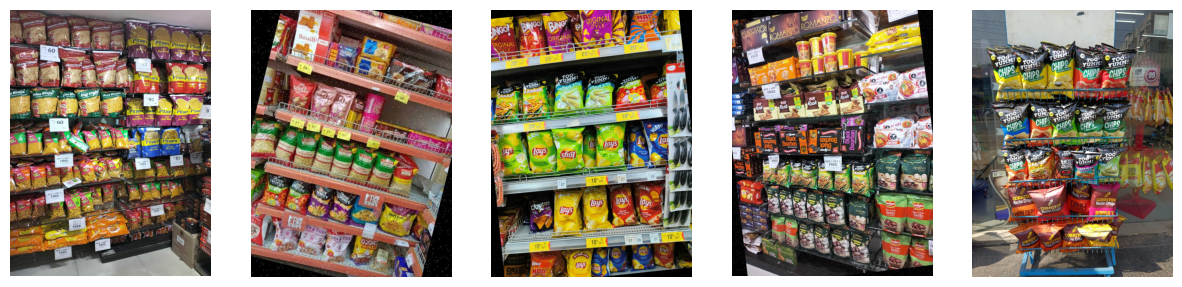

In [16]:
import cv2
import matplotlib.pyplot as plt
import random
import glob

# Load a few random images
image_paths = glob.glob("/kaggle/input/retail-object-v1i-yolov5pytorch/train/images/*.jpg")  # Ensure correct path pattern
sample_images = random.sample(image_paths, min(5, len(image_paths)))

# Display images
if sample_images:
    fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))

    # Ensure axes is always iterable
    if len(sample_images) == 1:
        axes = [axes]  # Convert single Axes object to a list

    for i, img_path in enumerate(sample_images):
        img = cv2.imread(img_path)[..., ::-1]  # Convert BGR to RGB
        axes[i].imshow(img)
        axes[i].axis("off")

    plt.show()
else:
    print("No images found in the specified directory.")



image 1/1 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/255_jpg.rf.c6ec339da78fec7f3539d876ecc5fd93.jpg: 640x288 2 bingo chips original style chillis, 2 bingo mad angle very peri peris, 1 kurkure green chutney flavour, 1 kurkure plays puffcorn yummy cheese, 3 lays chips indian magic masalas, 1 lays classic potato chips salted, 1 lays gourmet potato chips thai sweet chilli, 1 peppy chees balls, 2 too yumm dahi papdi chaat flavour multigrain chipss, 3 too yumm veggie stix chili chatakas, 3 too yumm veggie stix sour cream n onions, 8.0ms
Speed: 1.6ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 288)


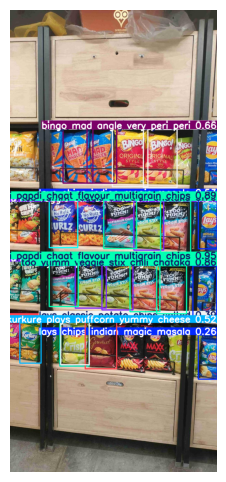


image 1/1 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/427_jpg.rf.b7cc5571381e82be74e7f01570f0ca5f.jpg: 640x480 1 diamond chips cream n onion, 1 diamond chips magic masala, 1 lays american cream n onion, 1 lays gourmet cheese paprika, 11 too yumm aloo chaat flavour potato stixs, 3 too yumm american style cream and onions, 4 too yumm dahi papdi chaat flavour multigrain chipss, 1 too yumm indian masala flavour potato chips, 2 too yumm rings tomato twists, 2 too yumm spicy chilli potato waferss, 7 too yumm veggie stix chili chatakas, 4 too yumm veggie stix sour cream n onions, 8.0ms
Speed: 2.2ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


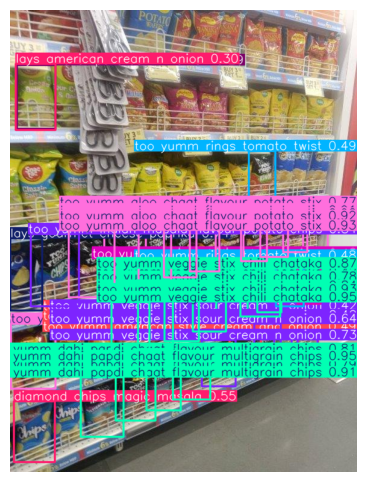


image 1/1 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/468_jpg.rf.1fb9dfad3ea87d2a0a5e16f22ee8ab88.jpg: 640x480 2 cornito nacho crisps sizzlin jalapenos, 1 cornitos cheese n herbs nacho chips, 1 doritos nacho cheese, 2 doritos nacho chips sweet chillis, 2 doritos sizzlin hots, 1 kurkure green chutney flavour, 1 lays american cream n onion, 2 lays chips indian magic masalas, 1 lays classic potato chips salted, 1 lays maxx sizzlin hot, 1 picnik classic tomato chilli, 1 pringles chips sour cream and onion, 1 too yumm aloo chaat flavour potato stix, 1 too yumm american style cream and onion, 1 too yumm rings tomato twist, 1 too yumm veggie stix chili chataka, 2 too yumm veggie stix sour cream n onions, 7.3ms
Speed: 2.5ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


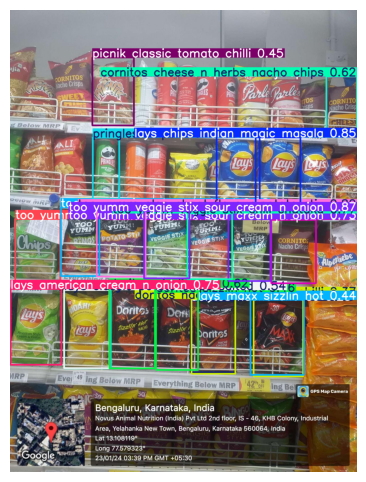


image 1/1 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/116_jpg.rf.3a6a49255e2d6e9ff31dc828e9ef67a0.jpg: 640x480 1 bingo chips original style chilli, 2 bingo hashtag cream n onions, 3 lays classic potato chips salteds, 2 too yumm aloo chaat flavour potato stixs, 2 too yumm american style cream and onions, 4 too yumm dahi papdi chaat flavour multigrain chipss, 3 too yumm indian masala flavour potato chipss, 4 too yumm potato chips classic salteds, 5 too yumm rings tomato twists, 3 too yumm spicy chilli potato waferss, 2 too yumm veggie stix chili chatakas, 3 too yumm veggie stix sour cream n onions, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


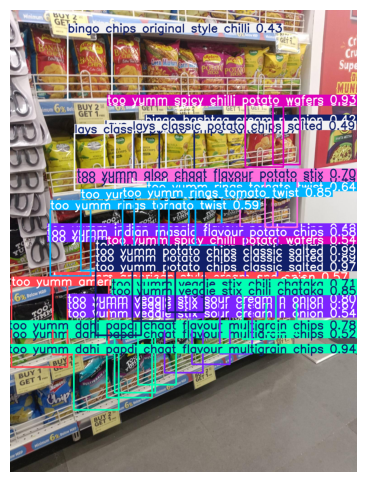


image 1/1 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/320_jpg.rf.9aba627e428068c27574ee04cc45cc0b.jpg: 640x480 1 bingo achaari masti mad angles, 3 bingo chips original style chillis, 1 doritos nacho chips sweet chilli, 1 kurkure chili chataka, 3 kurkure masaala munchs, 9 kurkure plays puffcorn yummy cheeses, 2 lays american cream n onions, 1 lays potato chips spanish tomato tango, 1 snac tac tangy tomato, 3 too yumm aloo chaat flavour potato stixs, 1 too yumm american style cream and onion, 4 too yumm dahi papdi chaat flavour multigrain chipss, 3 too yumm veggie stix chili chatakas, 3 too yumm veggie stix sour cream n onions, 2 uncal chips plain salteds, 7.5ms
Speed: 2.6ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


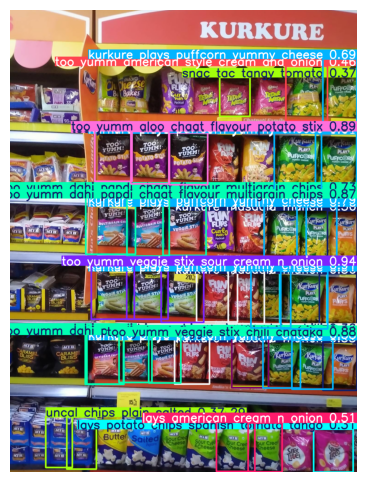

In [10]:
import torch
import matplotlib.pyplot as plt
import cv2
import glob
from ultralytics import YOLO  # Import YOLO class

# Load the best trained model
model_path = "/kaggle/working/yolov5/runs/detect/train2/weights/best.pt"
model = YOLO(model_path)

# Pick test images for visualization
test_images = glob.glob("/kaggle/input/retail-object-v1i-yolov5pytorch/test/images/*.jpg")[:5]  # Corrected path

# Run inference & visualize results
for img_path in test_images:
    results = model(img_path)  # Run YOLO on image
    result_img = results[0].plot()  # Plot detected objects

    # Display the result
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.axis("off")
    plt.show()



image 1/1 /kaggle/input/selfimg/g.jpg: 288x640 1 doritos nacho chips sweet chilli, 1 kurkure masaala munch, 1 kurkure plays puffcorn yummy cheese, 1 lays american cream n onion, 1 lays potato chips spanish tomato tango, 38.2ms
Speed: 1.6ms preprocess, 38.2ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)


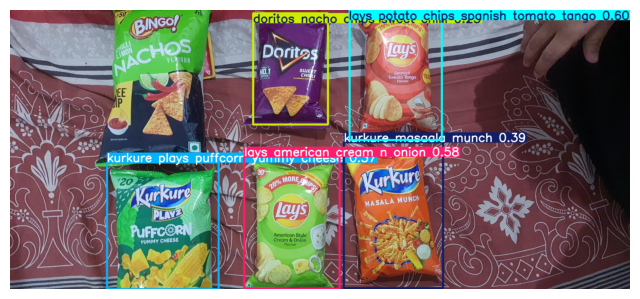

In [11]:


# Pick test images for visualization
test_images = glob.glob("/kaggle/input/selfimg/g.jpg") # Change path if needed

# Run inference & visualize
for img_path in test_images:
    results = model(img_path)  # Run YOLO on image
    result_img = results[0].plot()  # Plot the detected objects

    # Display the result
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

In [ ]:
# prompt: download the file /content/yolov5

from google.colab import files
files.download('/content/yolov5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

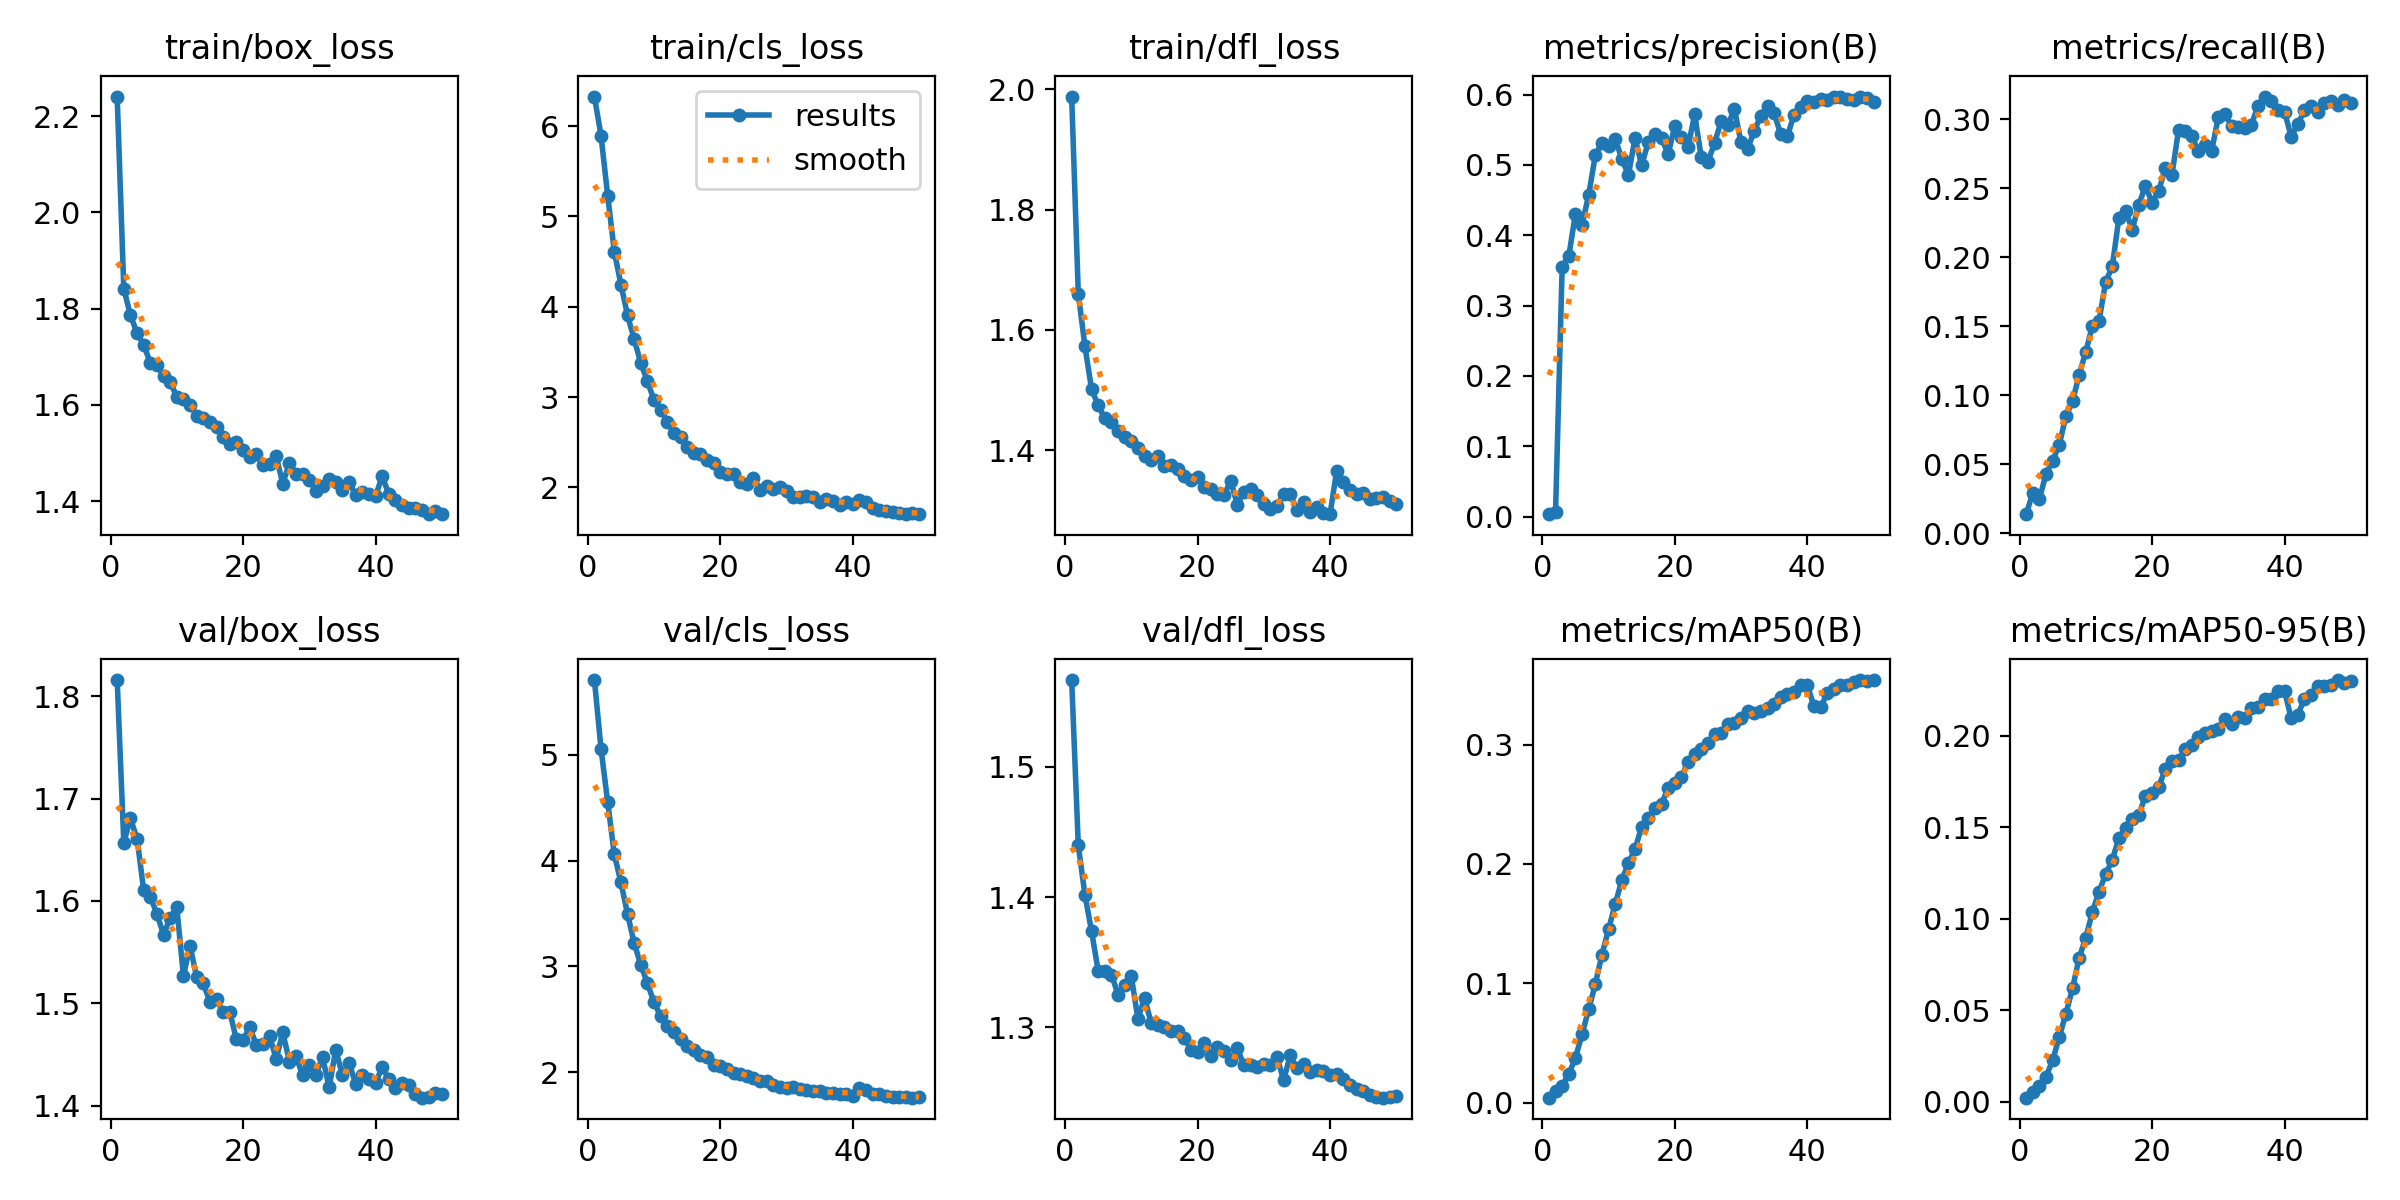

In [12]:
# prompt: print /content/yolov5/runs/detect/train/results.png

from IPython.display import Image

Image('/kaggle/working/yolov5/runs/detect/train/results.png')


In [33]:
model.tune(data="/kaggle/input/retail-object-v1i-yolov5pytorch/data.yaml", epochs=50)


Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
WARNING ❌️ training failure for hyperparameter tuning iteration 1
Command '['/usr/bin/python3', '-m', 'ultralytics.cfg.__init__', 'train', 'task=detect', 'mode=train', 'model=yolov8m.pt', 'data=/kaggle/input/retail-object-v1i-yolov5pytorch/data.yaml', 'epochs=50', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=True', 'save_period=-1', 'cache=False', 'device=None', 'workers=8', 'project=None', 'name=None', '

In [ ]:
from ultralytics import YOLO

# Load pre-trained YOLOv5 model
model = YOLO("yolov5l.pt")

# Train the model
model.train(
    data="/kaggle/input/retail-object-v1i-yolov5pytorch/data.yaml",  # Path to dataset
    epochs=50,
    batch=16,
    imgsz=640,

)


PRO TIP 💡 Replace 'model=yolov5l.pt' with new 'model=yolov5lu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 102M/102M [00:01<00:00, 92.4MB/s] 


Ultralytics 8.3.128 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/retail-object-v1i-yolov5pytorch/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

train: Scanning /kaggle/input/retail-object-v1i-yolov5pytorch/train/labels... 1038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1038/1038 [00:02<00:00, 511.17it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/retail-object-v1i-yolov5pytorch/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.8±0.5 ms, read: 382.2±50.5 MB/s, size: 555.2 KB)


val: Scanning /kaggle/input/retail-object-v1i-yolov5pytorch/valid/labels... 43 images, 1 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<00:00, 342.76it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/retail-object-v1i-yolov5pytorch/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=2.1e-05, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.3G      1.998      6.198      1.846        686        640: 100%|██████████| 65/65 [00:59<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         43       1198    0.00206     0.0366    0.00387     0.0025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.6G      1.655      5.155      1.458        695        640: 100%|██████████| 65/65 [00:59<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         43       1198      0.311     0.0432     0.0273     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.4G      1.672      4.094      1.437        683        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         43       1198      0.417      0.101     0.0835     0.0528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.5G      1.604      3.309      1.384        687        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         43       1198      0.521      0.124      0.151     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.8G      1.538      2.797      1.359        734        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         43       1198      0.465        0.2      0.202      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.5G      1.479      2.372      1.334        486        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         43       1198      0.523      0.243      0.266      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.5G      1.452      2.124      1.321        586        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         43       1198      0.491      0.306      0.318      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.4G      1.419      1.945      1.299        541        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         43       1198      0.579      0.313       0.35       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.6G      1.391      1.815      1.284        636        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         43       1198      0.513       0.35      0.369      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.6G      1.358       1.67       1.28        801        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         43       1198      0.537      0.372      0.391      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.5G      1.336      1.627       1.26        580        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         43       1198      0.566      0.395      0.421      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.3G      1.316      1.538       1.25        721        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         43       1198      0.645      0.374      0.441      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.7G      1.294       1.47      1.234        796        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         43       1198      0.559      0.419      0.453      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.5G      1.298      1.464      1.247        600        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         43       1198      0.616      0.384      0.465      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.7G      1.275       1.39      1.227        692        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         43       1198      0.587      0.436      0.482      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.6G      1.259      1.343      1.225        504        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         43       1198      0.552      0.453      0.487      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.5G      1.244      1.342      1.212        606        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         43       1198       0.62      0.437        0.5      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.8G      1.238      1.287       1.21        777        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         43       1198      0.596      0.457      0.509      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.6G      1.234      1.277      1.205        626        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         43       1198      0.622      0.455      0.524      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.5G      1.211      1.205      1.198        806        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         43       1198       0.59      0.475      0.528      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.6G      1.202      1.183      1.189        715        640: 100%|██████████| 65/65 [00:58<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         43       1198      0.547       0.51      0.546      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.7G       1.22      1.201      1.178        816        640:  17%|█▋        | 11/65 [00:09<00:48,  1.11it/s]

In [8]:
model.val()


Ultralytics 8.3.102 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv5l summary (fused): 128 layers, 53,497,633 parameters, 0 gradients, 136.7 GFLOPs


val: Scanning /kaggle/input/retail-object-v1i-yolov5pytorch/valid/labels... 43 images, 1 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<00:00, 456.83it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/retail-object-v1i-yolov5pytorch/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.46s/it]


                   all         43       1198      0.654      0.526      0.585      0.386
4700bc hawaiian barbeque cheese popcorn          1          3          1          0      0.995      0.552
act ii bliss caramel popcorn          3          8          1          0       0.29      0.154
act ii butter pop corn          1          2      0.609        0.5      0.557      0.339
act ii classic salted instant popcorn          2          3      0.911      0.333      0.359      0.251
act ii instant popcorn golden sizzle          2          9          0          0          0          0
act ii instant popcorn simply salted          1          1          0          0          0          0
act ii movie theatre butter flavour popcorn          1          9          0          0          0          0
act ii ready to eat sweet and salty popcorn          1          2          0          0          0          0
bikaji chips cream and onion          1          5      0.825      0.949      0.928      0.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 4.3ms preprocess, 35.1ms inference, 0.0ms loss, 100.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  2,   4,   6,   9,  10,  11,  13,  19,  41,  45,  46,  53,  54,  55,  56,  57,  62,  64,  65,  67,  69,  74,  75,  76,  79,  84,  86,  88,  89,  96, 109, 111, 114, 115, 119, 121, 130, 131, 133, 134, 136, 138, 139, 149, 150, 153, 156, 157, 159, 162, 164, 165, 167, 168, 176, 177, 182, 183, 185, 186, 190, 191,
       192, 196, 198, 199, 201, 207, 209, 215, 216, 217, 221, 239, 240, 242, 243, 244, 250, 254, 257, 259, 260, 261, 262, 266, 268, 270, 272, 274, 278, 279, 280, 281, 295, 297, 299, 300, 301, 318, 319, 320, 322, 324, 327, 331, 332, 334, 335, 336, 347, 349, 350, 351, 356, 357, 358, 359, 360, 361, 364, 368, 369, 386,
       388, 389, 396, 397, 398, 399, 402, 403, 404, 407, 411, 413, 414, 415, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 434, 435, 437, 438, 440, 441, 443, 444, 446, 450, 451, 452, 453, 454, 455, 458, 459, 460, 462, 463, 465, 467, 468, 469, 470, 474])
box: ultralytics.utils.metrics

In [9]:
results = model.predict(source="/kaggle/input/retail-object-v1i-yolov5pytorch/test/images", conf=0.5)



image 1/41 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/112_jpg.rf.1ae4b3ec953a29e1ea4484946c3fee04.jpg: 480x640 1 kurkure masaala munch, 2 picnik classic tomato chillis, 4 too yumm aloo chaat flavour potato stixs, 1 too yumm dahi papdi chaat flavour multigrain chips, 5 too yumm rings tomato twists, 46.4ms
image 2/41 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/116_jpg.rf.3a6a49255e2d6e9ff31dc828e9ef67a0.jpg: 640x480 1 bingo chips original style chilli, 1 daimond chips plain salted, 3 too yumm aloo chaat flavour potato stixs, 4 too yumm american style cream and onions, 3 too yumm dahi papdi chaat flavour multigrain chipss, 2 too yumm indian masala flavour potato chipss, 4 too yumm potato chips classic salteds, 6 too yumm rings tomato twists, 3 too yumm spicy chilli potato waferss, 1 too yumm veggie stix chili chataka, 3 too yumm veggie stix sour cream n onions, 43.3ms
image 3/41 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/120_jpg.rf.23bd6d14b73a


image 1/1 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/255_jpg.rf.c6ec339da78fec7f3539d876ecc5fd93.jpg: 640x288 1 bingo tedhe medhe masala tadka, 1 uncal chips spicy treat, 20.0ms
Speed: 1.6ms preprocess, 20.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 288)


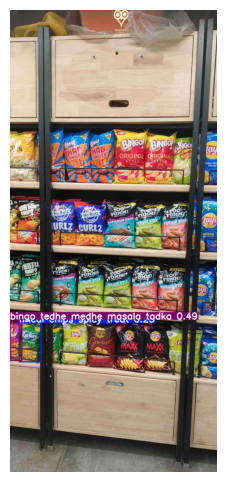


image 1/1 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/427_jpg.rf.b7cc5571381e82be74e7f01570f0ca5f.jpg: 640x480 1 bingo chips original style chilli, 1 lays classic potato chips salted, 1 snac tac chapata masala, 2 snac tac classic salteds, 3 snac tac cream n onions, 9 too yumm aloo chaat flavour potato stixs, 1 too yumm american style cream and onion, 5 too yumm dahi papdi chaat flavour multigrain chipss, 1 too yumm indian masala flavour potato chips, 1 too yumm rings tomato twist, 3 too yumm spicy chilli potato waferss, 6 too yumm veggie stix chili chatakas, 6 too yumm veggie stix sour cream n onions, 21.1ms
Speed: 2.1ms preprocess, 21.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


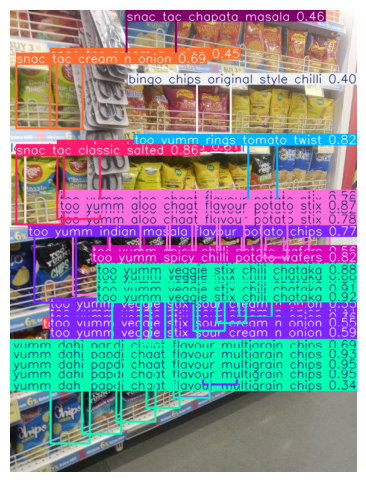


image 1/1 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/468_jpg.rf.1fb9dfad3ea87d2a0a5e16f22ee8ab88.jpg: 640x480 1 cornito nacho crisps sizzlin jalapeno, 1 cornitos cheese n herbs nacho chips, 1 cornitos nacho crisps sweet chilli, 1 diamond chips cream n onion, 1 doritos nacho cheese flavored, 2 doritos sizzlin hots, 1 lays american cream n onion, 3 lays chips indian magic masalas, 1 lays classic potato chips salted, 1 lays max macho chilli flavours, 1 parle potato chips classic salted, 1 parle wafers cream and onion, 1 parle wafers potato chips tangy tomato flavour, 2 picnik classic tomato chillis, 2 pringles chips originals, 1 pringles chips sour cream and onion, 1 too yumm aloo chaat flavour potato stix, 1 too yumm rings tomato twist, 1 too yumm veggie stix chili chataka, 2 too yumm veggie stix sour cream n onions, 20.5ms
Speed: 2.4ms preprocess, 20.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


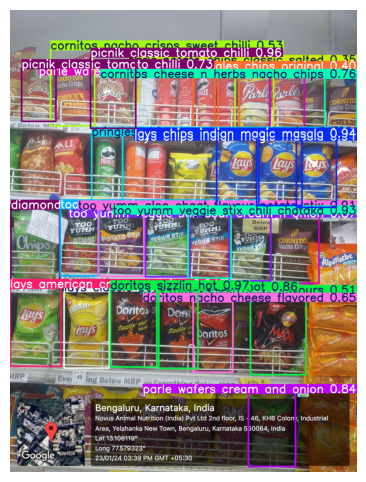


image 1/1 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/116_jpg.rf.3a6a49255e2d6e9ff31dc828e9ef67a0.jpg: 640x480 2 bingo chips original style chillis, 1 daimond chips plain salted, 3 too yumm aloo chaat flavour potato stixs, 4 too yumm american style cream and onions, 3 too yumm dahi papdi chaat flavour multigrain chipss, 2 too yumm indian masala flavour potato chipss, 4 too yumm potato chips classic salteds, 6 too yumm rings tomato twists, 3 too yumm spicy chilli potato waferss, 2 too yumm veggie stix chili chatakas, 3 too yumm veggie stix sour cream n onions, 20.4ms
Speed: 2.6ms preprocess, 20.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


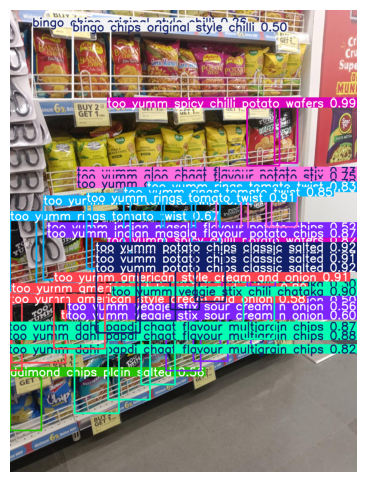


image 1/1 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/320_jpg.rf.9aba627e428068c27574ee04cc45cc0b.jpg: 640x480 2 fun flips curly puff mocktails, 6 fun flips puff sizzlin chineses, 2 fun flips puffs hot n saucy puffcorns, 1 fun flips puffs tango, 1 kurkure masaala munch, 10 kurkure plays puffcorn yummy cheeses, 2 kurkure playz puff masala munchs, 1 lays chips west indies hot nsweet chilli, 1 sundrop snacko bakes twisties cheese n herbs flavour crunchy snacks, 3 too yumm aloo chaat flavour potato stixs, 3 too yumm dahi papdi chaat flavour multigrain chipss, 1 too yumm multigrain chip s tangy tomato, 2 too yumm veggie stix chili chatakas, 3 too yumm veggie stix sour cream n onions, 20.4ms
Speed: 2.4ms preprocess, 20.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


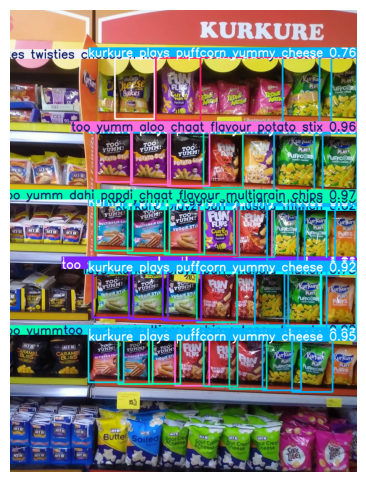

In [10]:
import torch
import matplotlib.pyplot as plt
import cv2
import glob
from ultralytics import YOLO  # Import YOLO class

# Load the best trained model
model_path = "/kaggle/working/yolov5/runs/detect/train/weights/best.pt"
model = YOLO(model_path)

# Pick test images for visualization
test_images = glob.glob("/kaggle/input/retail-object-v1i-yolov5pytorch/test/images/*.jpg")[:5]  # Corrected path

# Run inference & visualize results
for img_path in test_images:
    results = model(img_path)  # Run YOLO on image
    result_img = results[0].plot()  # Plot detected objects

    # Display the result
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.axis("off")
    plt.show()



image 1/1 /kaggle/input/addddaadd/WhatsApp Image 2025-03-22 at 15.46.43_a0483fdc.jpg: 640x384 1 act ii ready to eat popcorn sour cream n cheese, 2 lays american cream n onions, 45.3ms
Speed: 2.9ms preprocess, 45.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


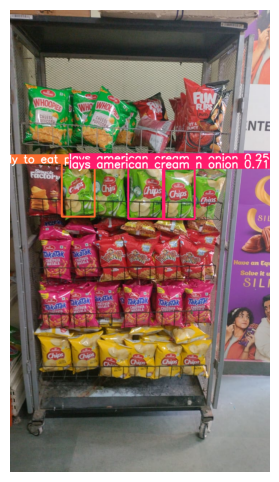

In [14]:


# Pick test images for visualization
test_images = glob.glob("/kaggle/input/addddaadd/WhatsApp Image 2025-03-22 at 15.46.43_a0483fdc.jpg") # Change path if needed

# Run inference & visualize
for img_path in test_images:
    results = model(img_path)  # Run YOLO on image
    result_img = results[0].plot()  # Plot the detected objects

    # Display the result
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

In [1]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 15.9 MB/s eta 0:00:00a 0:00:01


In [5]:
from ultralytics import YOLO

# Load YOLOv8 small model
model2 = YOLO("yolov8l.pt")  # You can also try yolov8m.pt, yolov8l.pt

# Train the model
model2.train(
    data="/kaggle/input/retail-object-v1i-yolov5pytorch/data.yaml",
    epochs=50,
    batch=16,
    imgsz=640,
    project="project",
    name="yolov8L_train",
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 83.7M/83.7M [00:00<00:00, 132MB/s] 


Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/retail-object-v1i-yolov5pytorch/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8L_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

100%|██████████| 755k/755k [00:00<00:00, 26.3MB/s]


Overriding model.yaml nc=80 with nc=475

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralyti

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 54.6±31.9 MB/s, size: 667.5 KB)


train: Scanning /kaggle/input/retail-object-v1i-yolov5pytorch/train/labels... 1038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1038/1038 [00:05<00:00, 205.49it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/retail-object-v1i-yolov5pytorch/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 63.3±16.0 MB/s, size: 555.2 KB)


val: Scanning /kaggle/input/retail-object-v1i-yolov5pytorch/valid/labels... 43 images, 1 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<00:00, 203.98it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/retail-object-v1i-yolov5pytorch/valid is not writeable, cache not saved.


Plotting labels to project/yolov8L_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=2.1e-05, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to project/yolov8L_train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.9G       1.98      6.244      1.873        686        640: 100%|██████████| 65/65 [01:05<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all         43       1198      0.408    0.00575    0.00983    0.00655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.3G      1.679      4.939      1.537        695        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         43       1198      0.262      0.054     0.0317     0.0194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.1G       1.66      3.745      1.492        683        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         43       1198      0.531      0.095     0.0947     0.0589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.2G       1.58      2.885      1.434        687        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         43       1198      0.478      0.179      0.173      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.3G      1.506      2.427      1.397        734        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         43       1198      0.484      0.253      0.251      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.2G      1.447      2.096      1.377        486        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         43       1198      0.469      0.294      0.316      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.2G      1.417      1.876      1.354        586        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         43       1198      0.528      0.328      0.368      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.1G       1.38      1.718      1.331        541        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         43       1198      0.615       0.34      0.408      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.1G      1.343       1.61      1.303        636        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         43       1198       0.58      0.373      0.431      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.2G      1.314      1.481      1.299        801        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         43       1198      0.598      0.405       0.47      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.2G      1.299      1.439      1.282        580        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         43       1198      0.612      0.435      0.494      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50        11G      1.276      1.361      1.268        721        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         43       1198      0.621      0.432      0.507      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.3G      1.252      1.301      1.255        796        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         43       1198      0.611      0.447      0.516      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.2G      1.256      1.301      1.266        600        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         43       1198      0.584      0.463      0.515       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.4G      1.231      1.234      1.244        692        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         43       1198      0.543      0.507      0.534      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.3G      1.218      1.193      1.245        504        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         43       1198       0.59      0.521      0.545      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.1G      1.198      1.181      1.233        606        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         43       1198      0.577       0.53      0.542      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.5G      1.192      1.138      1.227        777        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         43       1198      0.576      0.532      0.558      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.2G      1.185      1.133      1.219        626        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.602      0.537      0.559      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.2G      1.167       1.07      1.217        806        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         43       1198      0.582      0.552      0.568      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.2G      1.148      1.045      1.202        715        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.606      0.537      0.559      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.3G      1.151       1.05      1.199        684        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         43       1198      0.614      0.528      0.565      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.2G      1.133     0.9874      1.192        713        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.614      0.533      0.575      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.2G      1.127     0.9835      1.184        860        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         43       1198      0.624      0.543      0.588       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.2G      1.135      1.012      1.202        617        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         43       1198       0.65      0.542      0.582      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.1G      1.103     0.9348      1.177        708        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.646      0.524      0.579      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.3G      1.128     0.9826      1.189        416        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.643      0.543      0.577       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        11G      1.108     0.9609      1.193        458        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         43       1198      0.645      0.556      0.586      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.1G      1.094     0.9389      1.176        827        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         43       1198      0.627      0.549      0.585      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.4G      1.091     0.9188      1.165        639        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.626      0.564      0.579      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.2G      1.073     0.8902      1.159        706        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198       0.64      0.558      0.581      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.1G      1.069     0.8902      1.158        581        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.636      0.556      0.586      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.1G      1.087     0.9066       1.18        749        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.628      0.553      0.589      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.3G      1.076     0.8913      1.168        568        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.653       0.54      0.591      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.3G      1.058     0.8546      1.151        678        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.637      0.549      0.593      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.2G      1.065     0.8697      1.156        558        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         43       1198      0.655      0.548      0.595      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.3G      1.055     0.8512      1.148        642        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         43       1198      0.633      0.562        0.6      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.2G      1.053     0.8412      1.153        528        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         43       1198      0.627      0.557      0.598        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.1G      1.055     0.8457       1.15        720        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         43       1198      0.641      0.554      0.595      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.2G      1.041     0.8294      1.138        858        640: 100%|██████████| 65/65 [01:04<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.634      0.571      0.603      0.401


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        11G      1.061      0.834      1.194        412        640: 100%|██████████| 65/65 [01:04<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         43       1198      0.621      0.557      0.592      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        11G      1.029     0.7889      1.177        460        640: 100%|██████████| 65/65 [01:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         43       1198      0.618       0.56      0.594      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        11G      1.009     0.7699      1.162        327        640: 100%|██████████| 65/65 [01:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.628      0.555      0.592      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.8G      1.003     0.7524      1.157        430        640: 100%|██████████| 65/65 [01:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         43       1198      0.657      0.531      0.598      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        11G     0.9948     0.7527      1.154        354        640: 100%|██████████| 65/65 [01:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.668      0.533      0.598      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        11G     0.9998     0.7457       1.15        446        640: 100%|██████████| 65/65 [01:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         43       1198      0.675      0.532      0.594      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        11G     0.9882     0.7352      1.144        308        640: 100%|██████████| 65/65 [01:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         43       1198      0.662      0.545      0.598        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.8G     0.9812     0.7334      1.148        317        640: 100%|██████████| 65/65 [01:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         43       1198      0.689      0.534      0.603      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        11G     0.9859     0.7309      1.143        403        640: 100%|██████████| 65/65 [01:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.684      0.532      0.601      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        11G     0.9848     0.7292      1.138        303        640: 100%|██████████| 65/65 [01:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         43       1198      0.681      0.539      0.601      0.403



50 epochs completed in 0.932 hours.
Optimizer stripped from project/yolov8L_train/weights/last.pt, 88.4MB
Optimizer stripped from project/yolov8L_train/weights/best.pt, 88.4MB

Validating project/yolov8L_train/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 112 layers, 43,972,833 parameters, 0 gradients, 166.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]


                   all         43       1198      0.689      0.534      0.603      0.404
4700bc hawaiian barbeque cheese popcorn          1          3      0.657      0.648       0.83      0.542
act ii bliss caramel popcorn          3          8          1      0.358      0.765      0.451
act ii butter pop corn          1          2      0.707        0.5      0.507      0.304
act ii classic salted instant popcorn          2          3      0.878      0.333      0.346      0.277
act ii instant popcorn golden sizzle          2          9          0          0          0          0
act ii instant popcorn simply salted          1          1          0          0          0          0
act ii movie theatre butter flavour popcorn          1          9          1          0          0          0
act ii ready to eat sweet and salty popcorn          1          2          0          0          0          0
bikaji chips cream and onion          1          5          1          0      0.928      0.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 18.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to project/yolov8L_train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  2,   4,   6,   9,  10,  11,  13,  19,  41,  45,  46,  53,  54,  55,  56,  57,  62,  64,  65,  67,  69,  74,  75,  76,  79,  84,  86,  88,  89,  96, 109, 111, 114, 115, 119, 121, 130, 131, 133, 134, 136, 138, 139, 149, 150, 153, 156, 157, 159, 162, 164, 165, 167, 168, 176, 177, 182, 183, 185, 186, 190, 191,
       192, 196, 198, 199, 201, 207, 209, 215, 216, 217, 221, 239, 240, 242, 243, 244, 250, 254, 257, 259, 260, 261, 262, 266, 268, 270, 272, 274, 278, 279, 280, 281, 295, 297, 299, 300, 301, 318, 319, 320, 322, 324, 327, 331, 332, 334, 335, 336, 347, 349, 350, 351, 356, 357, 358, 359, 360, 361, 364, 368, 369, 386,
       388, 389, 396, 397, 398, 399, 402, 403, 404, 407, 411, 413, 414, 415, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 434, 435, 437, 438, 440, 441, 443, 444, 446, 450, 451, 452, 453, 454, 455, 458, 459, 460, 462, 463, 465, 467, 468, 469, 470, 474])
box: ultralytics.utils.metrics

In [6]:
model2.val()


Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 112 layers, 43,972,833 parameters, 0 gradients, 166.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 768.5±117.1 MB/s, size: 471.7 KB)


val: Scanning /kaggle/input/retail-object-v1i-yolov5pytorch/valid/labels... 43 images, 1 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<00:00, 431.62it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/retail-object-v1i-yolov5pytorch/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.46s/it]


                   all         43       1198      0.679      0.538      0.604      0.404
4700bc hawaiian barbeque cheese popcorn          1          3      0.646      0.625       0.83      0.543
act ii bliss caramel popcorn          3          8          1      0.356      0.765      0.451
act ii butter pop corn          1          2      0.712        0.5      0.507      0.304
act ii classic salted instant popcorn          2          3      0.889      0.333      0.347      0.277
act ii instant popcorn golden sizzle          2          9          0          0          0          0
act ii instant popcorn simply salted          1          1          0          0          0          0
act ii movie theatre butter flavour popcorn          1          9          1          0          0          0
act ii ready to eat sweet and salty popcorn          1          2          0          0          0          0
bikaji chips cream and onion          1          5          1          0      0.928      0.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 4.3ms preprocess, 62.1ms inference, 0.0ms loss, 76.6ms postprocess per image
Results saved to project/yolov8L_train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  2,   4,   6,   9,  10,  11,  13,  19,  41,  45,  46,  53,  54,  55,  56,  57,  62,  64,  65,  67,  69,  74,  75,  76,  79,  84,  86,  88,  89,  96, 109, 111, 114, 115, 119, 121, 130, 131, 133, 134, 136, 138, 139, 149, 150, 153, 156, 157, 159, 162, 164, 165, 167, 168, 176, 177, 182, 183, 185, 186, 190, 191,
       192, 196, 198, 199, 201, 207, 209, 215, 216, 217, 221, 239, 240, 242, 243, 244, 250, 254, 257, 259, 260, 261, 262, 266, 268, 270, 272, 274, 278, 279, 280, 281, 295, 297, 299, 300, 301, 318, 319, 320, 322, 324, 327, 331, 332, 334, 335, 336, 347, 349, 350, 351, 356, 357, 358, 359, 360, 361, 364, 368, 369, 386,
       388, 389, 396, 397, 398, 399, 402, 403, 404, 407, 411, 413, 414, 415, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 434, 435, 437, 438, 440, 441, 443, 444, 446, 450, 451, 452, 453, 454, 455, 458, 459, 460, 462, 463, 465, 467, 468, 469, 470, 474])
box: ultralytics.utils.metrics

In [7]:
results = model2.predict(source="/kaggle/input/retail-object-v1i-yolov5pytorch/test/images", conf=0.5)



image 1/41 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/112_jpg.rf.1ae4b3ec953a29e1ea4484946c3fee04.jpg: 480x640 2 bingo achaari masti mad angless, 1 kurkure masaala munch, 2 picnik classic tomato chillis, 4 too yumm aloo chaat flavour potato stixs, 1 too yumm dahi papdi chaat flavour multigrain chips, 5 too yumm rings tomato twists, 41.5ms
image 2/41 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/116_jpg.rf.3a6a49255e2d6e9ff31dc828e9ef67a0.jpg: 640x480 2 daimond chips plain salteds, 3 too yumm aloo chaat flavour potato stixs, 3 too yumm american style cream and onions, 3 too yumm dahi papdi chaat flavour multigrain chipss, 2 too yumm indian masala flavour potato chipss, 4 too yumm potato chips classic salteds, 6 too yumm rings tomato twists, 3 too yumm spicy chilli potato waferss, 2 too yumm veggie stix chili chatakas, 3 too yumm veggie stix sour cream n onions, 40.7ms
image 3/41 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/120_jpg.rf.23bd6d14b73a


image 1/1 /kaggle/input/selfimg/g.jpg: 288x640 1 doritos nacho chips sweet chilli, 1 kurkure masaala munch, 1 kurkure plays puffcorn yummy cheese, 1 lays american cream n onion, 1 lays potato chips spanish tomato tango, 47.0ms
Speed: 1.7ms preprocess, 47.0ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)


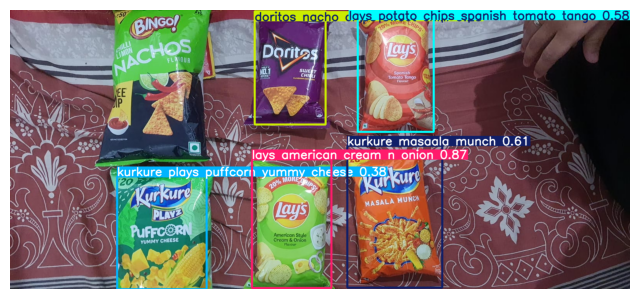

In [8]:

import torch
import matplotlib.pyplot as plt
import cv2
import glob
from ultralytics import YOLO  # Import YOLO class

# Load the best trained model
model_path = "/kaggle/working/project/yolov8L_train/weights/best.pt"
model = YOLO(model_path)

# Pick test images for visualization
test_images = glob.glob("/kaggle/input/selfimg/g.jpg") # Change path if needed

# Run inference & visualize
for img_path in test_images:
    results = model(img_path)  # Run YOLO on image
    result_img = results[0].plot()  # Plot the detected objects

    # Display the result
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

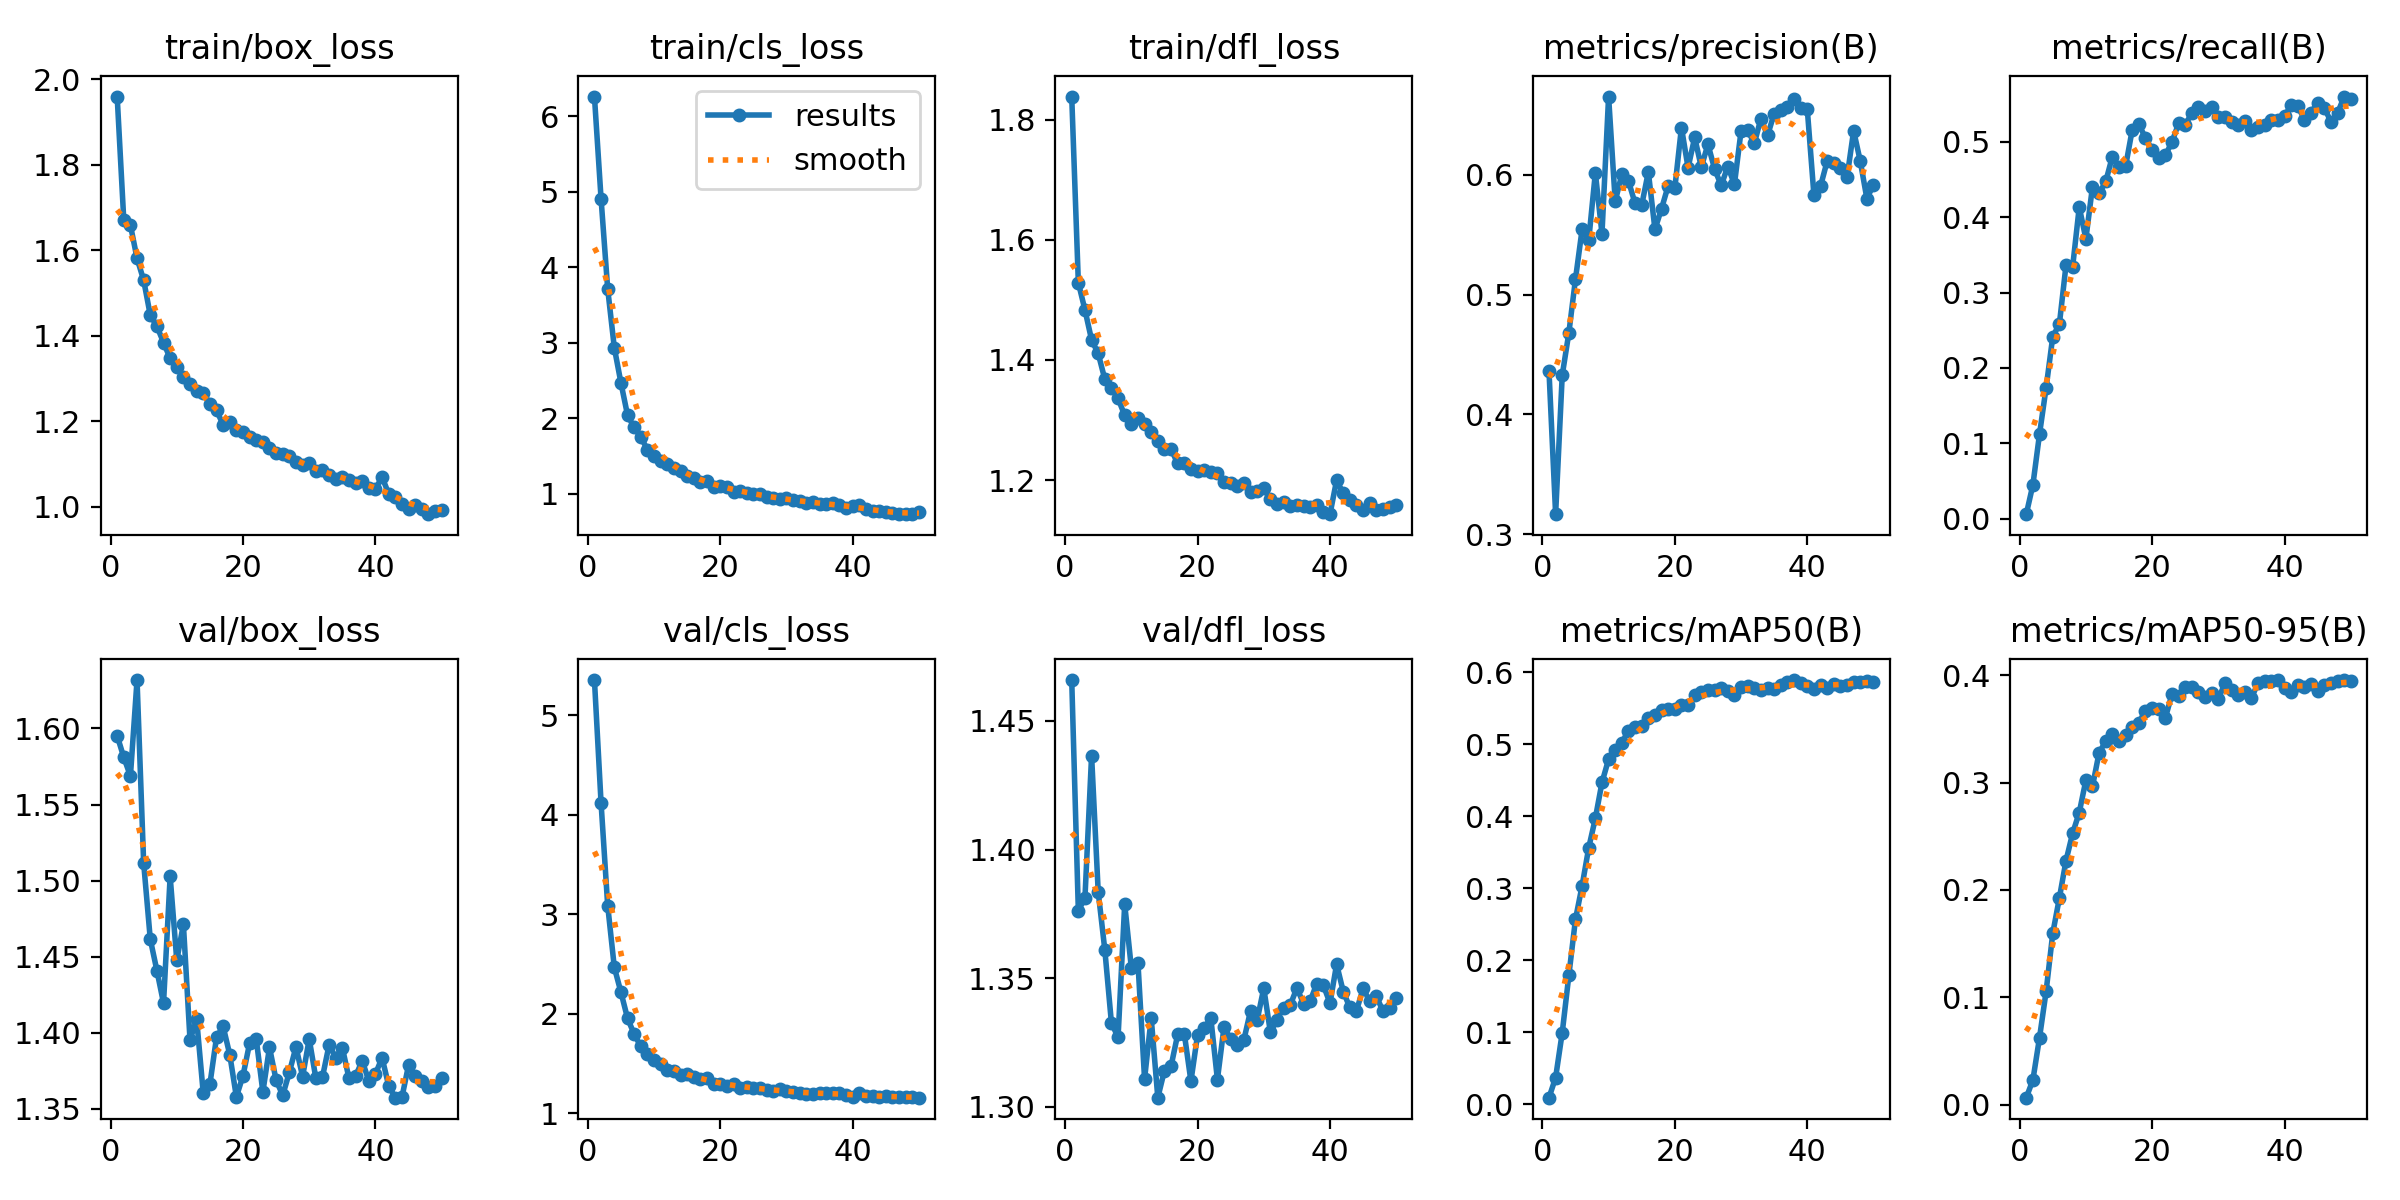

In [10]:
# prompt: print /content/yolov5/runs/detect/train/results.png

from IPython.display import Image

Image('/kaggle/working/project/yolov8L_train/results.png')



image 1/1 /kaggle/input/selfimg/g.jpg: 288x640 1 doritos nacho chips sweet chilli, 1 kurkure masaala munch, 1 lays american cream n onion, 1 lays potato chips spanish tomato tango, 19.2ms
Speed: 2.4ms preprocess, 19.2ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)


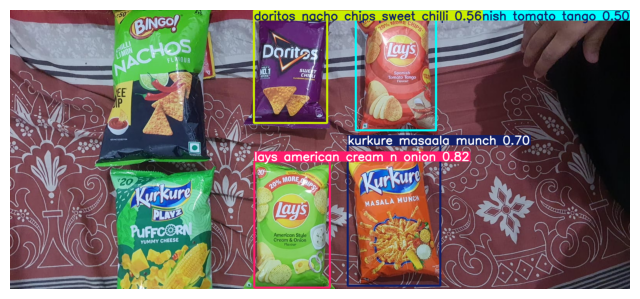

In [11]:

import torch
import matplotlib.pyplot as plt
import cv2
import glob
from ultralytics import YOLO  # Import YOLO class

# Load the best trained model
model_path = "/kaggle/working/yolov5/project/yolov8L_train/weights/best.pt"
model = YOLO(model_path)

# Pick test images for visualization
test_images = glob.glob("/kaggle/input/selfimg/g.jpg") # Change path if needed

# Run inference & visualize
for img_path in test_images:
    results = model(img_path)  # Run YOLO on image
    result_img = results[0].plot()  # Plot the detected objects

    # Display the result
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


image 1/1 /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/320_jpg.rf.9aba627e428068c27574ee04cc45cc0b.jpg: 640x480 2 act ii bliss caramel popcorns, 1 bingo mad angels mmmm masala, 2 fun flips curly puff mocktails, 4 fun flips puff sizzlin chineses, 4 kurkure masaala munchs, 11 kurkure plays puffcorn yummy cheeses, 1 peppy classic tomato, 2 picnik classic tomato chillis, 1 sundrop snacko bakes twisties cheese n herbs flavour crunchy snacks, 3 too yumm aloo chaat flavour potato stixs, 3 too yumm dahi papdi chaat flavour multigrain chipss, 1 too yumm multigrain chip s tangy tomato, 2 too yumm veggie stix chili chatakas, 3 too yumm veggie stix sour cream n onions, 42.7ms
Speed: 2.6ms preprocess, 42.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

Detections for: /kaggle/input/retail-object-v1i-yolov5pytorch/test/images/320_jpg.rf.9aba627e428068c27574ee04cc45cc0b.jpg


Product  Count
0                 kurkure plays puffcorn yummy cheese     11
1                      fun flips puff sizzlin chinese      4
2                               kurkure masaala munch      4
3             too yumm aloo chaat flavour potato stix      3
4   too yumm dahi papdi chaat flavour multigrain c...      3
5             too yumm veggie stix sour cream n onion      3
6                        picnik classic tomato chilli      2
7                  too yumm veggie stix chili chataka      2
8                       fun flips curly puff mocktail      2
9                        act ii bliss caramel popcorn      2
10            too yumm multigrain chip s tangy tomato      1
11                       bingo mad angels mmmm masala      1
12  sundrop snacko bakes twisties cheese n herbs f...      1
13                               peppy classic tomato      1

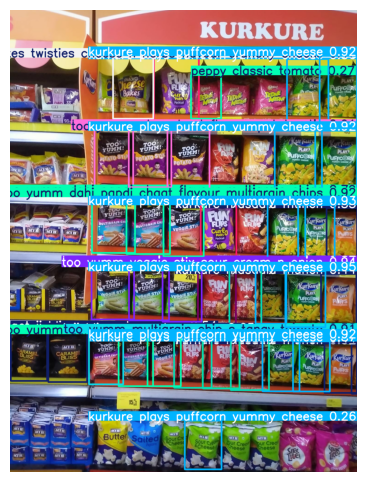

In [16]:
import pandas as pd
# Load the trained model
model_path = "/kaggle/working/yolov5/project/yolov8L_train/weights/best.pt"
model = YOLO(model_path)

# Load test images
test_images = glob.glob("/kaggle/input/retail-object-v1i-yolov5pytorch/test/images/320_jpg.rf.9aba627e428068c27574ee04cc45cc0b.jpg")

for img_path in test_images:
    results = model(img_path)  # Run inference
    result_img = results[0].plot()  # Annotated image

    # Get class IDs
    boxes = results[0].boxes
    class_ids = boxes.cls.cpu().numpy().astype(int)
    names = results[0].names
    class_names = [names[i] for i in class_ids]

    # Create a DataFrame and group by class name to count occurrences
    df = pd.DataFrame({'Product': class_names})
    product_counts = df['Product'].value_counts().reset_index()
    product_counts.columns = ['Product', 'Count']

    # Display results
    print(f"\nDetections for: {img_path}")
    display(product_counts)

    # Display annotated image
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()